# **TUGAS 4**

Materi:
- Matrices
- Matrix Examples

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

## **Nilai Akhir Murid**
---
- Sebagai seorang guru diakhir masa didik, kita ingin menentukan nilai akhir 3 orang siswa. 
- Data yang kita miliki adalah nilai untuk ujian, project, PR, dan quiz. 
- Selain itu, nilai-nilai tersebut memiliki bobot tersendiri terhadap nilai akhir. Berikut detailnya.

| Murid | Ujian | Projects | PR | Quiz        
| :-: | :-: | :-: | :-: | :-: |
| Alexandra | 92 | 100 | 89 | 80 |
| Megan | 72 | 85 | 80 | 75 |
| Britney | 88 | 78 | 85 | 92 |

| Tipe | Bobot | 
| :-: | :-: | 
| Ujian | 40% |
| Projects | 15% |
| PR | 25% |
| Quiz | 20% |

---
**Soal 6**

- Buatlah matrix nilai tiap murid & matrix bobot

In [ ]:
# Jawab
nilai_murid = ...
bobot = ...

---
**Soal 7**

- Berapa nilai akhir dari setiap murid?

In [ ]:
# Jawab
nilai_akhir = ...

---
**Soal 8**

- Berapa jumlah murid yang mendapat nilai A? (batas terendah nilai A adalah 80)

In [ ]:
# Jawab
jumlah_A = ...

## **Electricity Demands Modeling**
---
- Diberikan data electricity demands selama beberapa periode.

   month  electricity
0      0        22.97
1      1         4.35
2      2        30.87
3      3        13.19
4      4        33.68


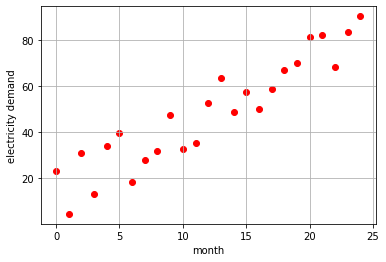

In [ ]:
demand_df = pd.read_csv('data_linalg_tugas04/electricity_demand.csv')
print(demand_df.head(5))

# plot
plt.scatter(demand_df['month'], demand_df['electricity'], c='r')
plt.grid()
plt.xlabel('month')
plt.ylabel('electricity demand')
plt.show()

- Kita ingin prediksi demand 5 bulan kedepan. 
- Kita hire 2 orang data scientist dan menugaskan mereka untuk membuat model. Model didekati secara *linear*.
- Berikut adalah 2 model yang dibuat.
   - Model 1: $\text{electricity} = 3.75\times\text{month} + 0.9$
   - Model 2: $\text{electricity} = 3.0\times\text{month} + 10$

**Jawab Pertanyaan Berikut**
1. Model mana yang kita pakai?
2. Berapa prediksi demand 5 bulan kedepan berdasarkan model yang dipakai?

---
**Soal 9**
- Tulis langkah-langkah yang dibutuhkan untuk menjawab permasalahan tersebut.

In [ ]:
# Jawab
langkah = """
- Tulis dalam point per point
- Tulis dalam point per point
"""
# Hint: perbandingan error, Mean Absolute Error.

---
**Soal 10**

- Carilah jawaban dari permasalahan mengikuti langkah-langkah yang Anda tulis di soal nomor 9

In [ ]:
# Tulis code disini
# Sertakan komentar agar code mudah dimengerti
...

## **SOAL BONUS: Blur Lena**
---
- Kita punya gambar Lena

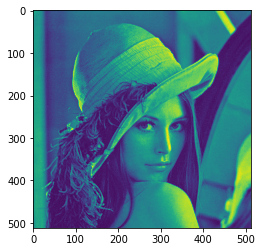

In [ ]:
# Load gambar
img = cv2.imread('data_linalg_tugas04/lena.png', 0)
plt.imshow(img)
plt.show()

**Blur Gambar di atas menggunakan convolution matrix dari scratch**

In [ ]:
# Jawab
# Notes: Gunakan kernel yang semua elemennya bernilai 1
...